ML Mini project on : 

Batch Details - DSE ONLINE MAY 2023
Group Details - Group_07

Group Members



# About the data set (Customer Segmentation data)

The dataset contains information about consumer. The aim is to determine which class does a particular consumer belong to based on the several factors from their profile.


Attribute information:

InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product. Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.

UnitPrice: Unit price. Numeric, Product price per unit in sterling.

CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal, the name of the country where each customer resides.

Age : The age of the consumer.

Gender : Gender of the consumer.

Salary : Salary of the consumer.

Segmentation : The segment under which the Customer falls.i.e Low,Medium,High

# 1. Import Libraries

Let us import the required libraries.

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder


# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.graphics.gofplots import qqplot

# import 'stats'
from scipy import stats

from category_encoders import TargetEncoder

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# import functions to perform feature selection

from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import functions to perform cross validation
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.pipeline import Pipeline


from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import classification_report, f1_score



from scipy.stats import shapiro


from sklearn.model_selection import cross_val_score, KFold


from sklearn.linear_model import Lasso, Ridge, ElasticNet

from sklearn.model_selection import GridSearchCV

from scipy.stats import f_oneway

from sklearn.model_selection import GridSearchCV


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

# Optional: For handling imbalanced classes
from sklearn.model_selection import cross_val_score, StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE

ModuleNotFoundError: No module named 'category_encoders'

# 2. Data Preparation
Step 1: Read the dataset and print the first five observations.

In [2]:
df=pd.read_excel("Customer.xlsx")
df.head()

,Index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Age,Gender,Salary,Total Amount,Segmentation
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 14:32:00,2.550000,17850.000000,United Kingdom,25.000000,F,50000.000000,15.300000,LOW
1,1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 14:33:00,3.390000,17850.000000,United Kingdom,25.000000,F,50000.000000,20.340000,MEDIUM
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 14:33:00,2.750000,17850.000000,United Kingdom,25.000000,F,50000.000000,22.000000,MEDIUM
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 14:34:00,3.390000,17850.000000,United Kingdom,25.000000,F,50000.000000,20.340000,MEDIUM
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 14:34:00,3.390000,17850.000000,United Kingdom,25.000000,F,50000.000000,20.340000,MEDIUM


Step 2: Read the data, and convert the data types.
1. Data Dimension

In [3]:
df.shape

(9999, 14)

2.Display basic information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Index         9999 non-null   int64         
 1   InvoiceNo     9999 non-null   object        
 2   StockCode     9999 non-null   object        
 3   Description   9957 non-null   object        
 4   Quantity      9999 non-null   int64         
 5   InvoiceDate   608 non-null    datetime64[ns]
 6   UnitPrice     9999 non-null   float64       
 7   CustomerID    9787 non-null   float64       
 8   Country       9999 non-null   object        
 9   Age           9471 non-null   float64       
 10  Gender        9391 non-null   object        
 11  Salary        9576 non-null   float64       
 12  Total Amount  9999 non-null   float64       
 13  Segmentation  9999 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 1.1+ MB


In [5]:
df.describe()

,Index,Quantity,UnitPrice,CustomerID,Age,Salary,Total Amount
count,9999.000000,9999.000000,9999.000000,9787.000000,9471.000000,9576.000000,9999.000000
mean,4999.000000,7.829183,3.837371,15318.833657,44.116566,52039.891395,18.067732
std,2886.607005,104.327618,14.310863,1812.208166,12.637415,33772.834668,54.785832
min,0.000000,-9360.000000,0.000000,12395.000000,20.000000,0.000000,-403.200000
25%,2499.500000,1.000000,1.250000,13418.000000,35.000000,25000.000000,3.300000
50%,4999.000000,2.000000,2.510000,15544.000000,47.000000,40000.000000,8.420000
75%,7498.500000,8.000000,4.210000,16916.000000,55.000000,70000.000000,17.000000
max,9998.000000,2880.000000,887.520000,18239.000000,68.000000,150000.000000,1627.200000


In [6]:
df.describe(include="object").T

,count,unique,top,freq
InvoiceNo,9999,512,536876,593
StockCode,9999,2015,22632,63
Description,9957,1981,HAND WARMER UNION JACK,59
Country,9999,15,United Kingdom,9402
Gender,9391,2,M,5820
Segmentation,9999,3,LOW,4750


In [7]:
df.columns

Index(['Index', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'Age', 'Gender',
       'Salary', 'Total Amount', 'Segmentation'],
      dtype='object')

In [8]:
df.dtypes

Index                    int64
InvoiceNo               object
StockCode               object
Description             object
Quantity                 int64
InvoiceDate     datetime64[ns]
UnitPrice              float64
CustomerID             float64
Country                 object
Age                    float64
Gender                  object
Salary                 float64
Total Amount           float64
Segmentation            object
dtype: object

3.Convert the datatypes

In [9]:
df["Country"]=df["Country"].astype("category")

In [10]:
df["Gender"]=df["Gender"].astype("category")

In [11]:
df["Segmentation"]=df["Segmentation"].astype("category")

4. Dropping reductant columns

In [12]:
df.drop(['Index',"InvoiceDate"],axis=1,inplace=True)

Insight

'Index',"InvoiceDate"

These columns contain specific details like Index,InvoiceDate which are not needed for the current analysis.

5.Check for Duplicate Records

In [13]:
duplicate_records = df.duplicated().sum()
duplicate_records

196

In [14]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

Insight

Before dropping duplicates: 196 (original number of duplicates)

After dropping duplicates: 0 (no remaining duplicates after removal)

6.Segrating the variables based on categorical and numerical

In [15]:
num_col=df.select_dtypes(exclude=["object","category"])
print(num_col.columns)

Index(['Quantity', 'UnitPrice', 'CustomerID', 'Age', 'Salary', 'Total Amount'], dtype='object')


In [16]:
cat_col=df.select_dtypes(include=["object","category"])
print(cat_col.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Country', 'Gender',
       'Segmentation'],
      dtype='object')


7.Summarizing observations for categorical variables – no. of categories, % observations in each category

In [17]:
df.Country.value_counts()/len(df)*100

United Kingdom   93.910028
Germany           1.846374
EIRE              1.111905
France            1.081302
Norway            0.744670
Lithuania         0.346833
Italy             0.244823
Japan             0.163215
Australia         0.142813
Belgium           0.122412
Poland            0.081608
Portugal          0.071407
Switzerland       0.061206
Spain             0.051005
Netherlands       0.020402
Name: Country, dtype: float64

In [18]:
df.Gender.value_counts()/len(df)*100

M   58.329083
F   35.468734
Name: Gender, dtype: float64

In [19]:
df.Segmentation.value_counts()/len(df)*100

LOW      47.403856
MEDIUM   32.622667
HIGH     19.973478
Name: Segmentation, dtype: float64

# Check for Missing Values

In [20]:
Total_Count = df.isnull().sum()

Percent_Count = ( Total_Count/len(df)*100)

Missing_Values = pd.concat([Total_Count,Percent_Count], axis=1, keys=["Missing_Values","Perecnetage_of_Null_Values"])

sort_null = Missing_Values.sort_values(by="Missing_Values", ascending=False)
sort_null

,Missing_Values,Perecnetage_of_Null_Values
Gender,608,6.202183
Age,528,5.386106
Salary,423,4.315006
CustomerID,212,2.162603
Description,42,0.428440
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000


# Imputing Missing Values

In [21]:
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])

In [22]:
df["Age"]=df["Age"].fillna(df["Age"].median())

In [23]:
df["Salary"]=df["Salary"].fillna(df["Salary"].mean())

In [24]:
df["CustomerID"]=df["CustomerID"].fillna(df["CustomerID"].median())

In [25]:
df.dropna(inplace=True)

In [26]:
df.isnull().sum().sum()

0

# Check for outliers

<Axes: >

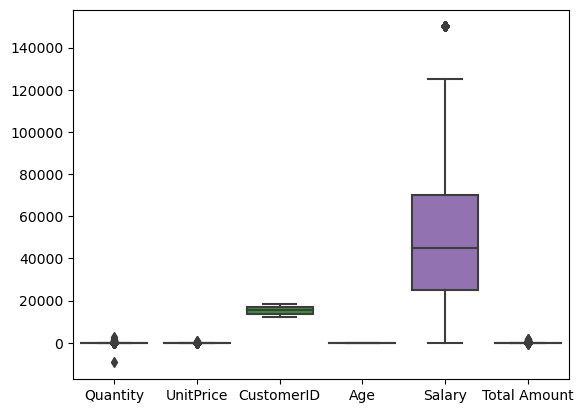

In [27]:
sns.boxplot(df)

# Treatment of outliers

In [28]:
q1_quant=df["Quantity"].quantile(0.25)
q3_quant=df["Quantity"].quantile(0.75)
iqr_quant=q3_quant-q1_quant
lower_bound = q1_quant - 1.5 * iqr_quant
upper_bound = q3_quant + 1.5 * iqr_quant

df=df[~((df['Quantity'] < lower_bound))]

In [29]:
q1_Salary=df["Salary"].quantile(0.25)
q3_Salary=df["Salary"].quantile(0.75)
iqr_Salary=q3_Salary-q1_Salary
lower_bound = q1_Salary - 1.5 * iqr_Salary
upper_bound = q3_Salary + 1.5 * iqr_Salary

df = df[~((df['Salary'] < lower_bound) | (df['Salary'] > upper_bound))]

In [30]:
q1_amount=df["Total Amount"].quantile(0.25)
q3_amount=df["Total Amount"].quantile(0.75)
iqr_amount=q3_amount-q1_amount
lower_bound = q1_amount - 1.5 * iqr_amount
upper_bound = q3_amount + 1.5 * iqr_amount

df = df[~(df['Total Amount'] < lower_bound)]

<Axes: >

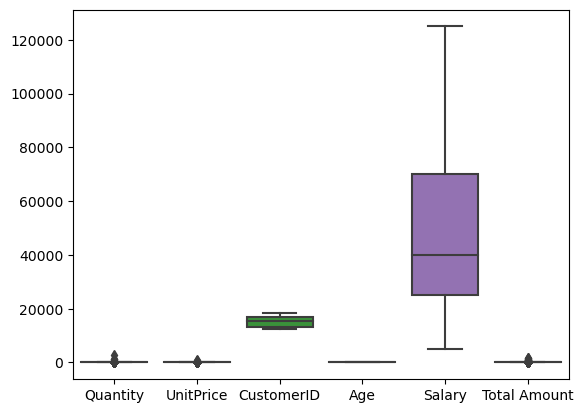

In [31]:
sns.boxplot(df)

# Perform statistical hypothesis testing on features to get an idea of whether features are impacting the target variables.

In [32]:
df.corr()

,Quantity,UnitPrice,CustomerID,Age,Salary,Total Amount
Quantity,1.000000,-0.024440,-0.001584,-0.012320,-0.002969,0.481249
UnitPrice,-0.024440,1.000000,-0.035159,-0.018002,-0.010933,0.300625
CustomerID,-0.001584,-0.035159,1.000000,0.047816,-0.078036,-0.004934
Age,-0.012320,-0.018002,0.047816,1.000000,0.263775,-0.035430
Salary,-0.002969,-0.010933,-0.078036,0.263775,1.000000,-0.016136
Total Amount,0.481249,0.300625,-0.004934,-0.035430,-0.016136,1.000000


<Axes: >

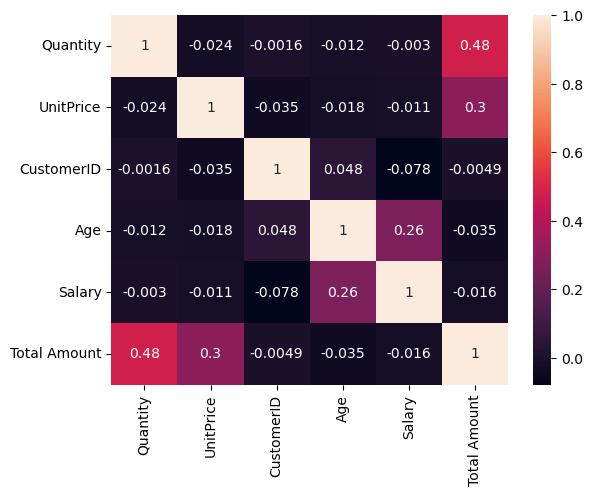

In [33]:
sns.heatmap(df.corr(),annot=True)

# Check skewness and kurtosis

In [34]:
print("Skewness\n",num_col.skew())

Skewness
 Quantity       -68.518645
UnitPrice       42.641813
CustomerID      -0.000976
Age             -0.092977
Salary           1.109270
Total Amount    13.832763
dtype: float64


In [35]:
print("Kurtosis\n",num_col.kurtosis())

Kurtosis
 Quantity       6449.418754
UnitPrice      2144.205237
CustomerID       -1.272034
Age              -0.952893
Salary            0.997913
Total Amount    292.907441
dtype: float64


Insight

1.Skewness measures the asymmetry of the distribution. Positive values indicate right-skewed,
while negative values indicate left-skewed.

2.Kurtosis measures the tails and sharpness of the peak. Higher values indicate heavier tails and a sharper peak.

3.'Quantity' is strongly left-skewed, while 'unitprice' and 'Total amount' are right-skewed.

4.High kurtosis in 'Quantity' suggests heavy tails and potential outliers.

5.Understanding skewness and kurtosis helps in assessing the distributional characteristics of the data.

Visulization of Skewness of data

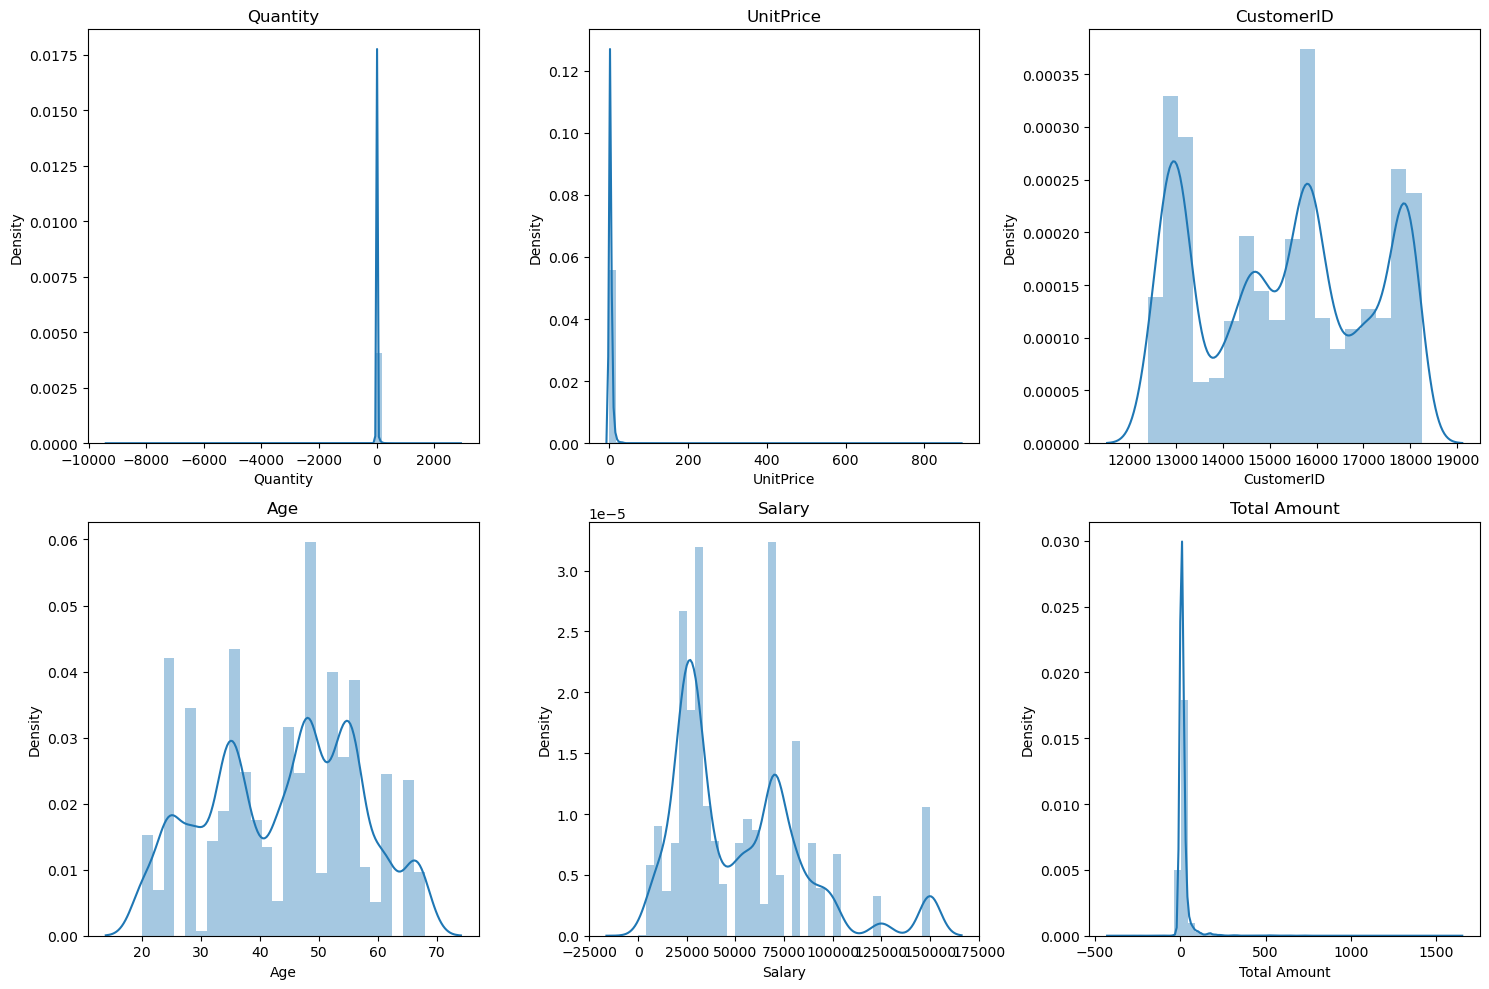

In [36]:
plt.figure(figsize=(15, 10))  

for i, column in enumerate(num_col.columns):
    plt.subplot(2, 3, i+1)  
    sns.distplot(num_col[column])
    plt.title(column)
    plt.tight_layout()

plt.show()

# EDA

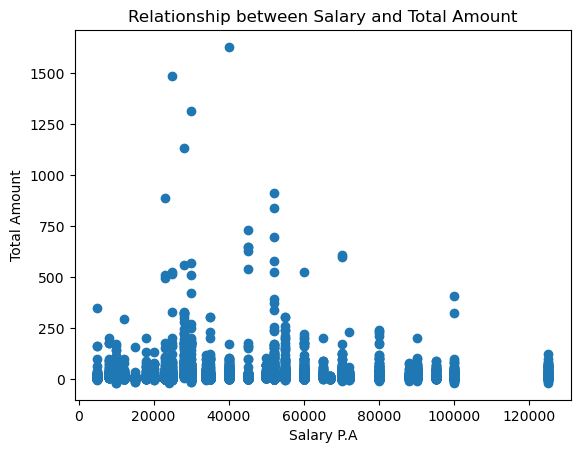

In [37]:
plt.scatter(df["Salary"], df["Total Amount"])
plt.xlabel("Salary P.A")
plt.ylabel("Total Amount")
plt.title("Relationship between Salary and Total Amount")
plt.show()

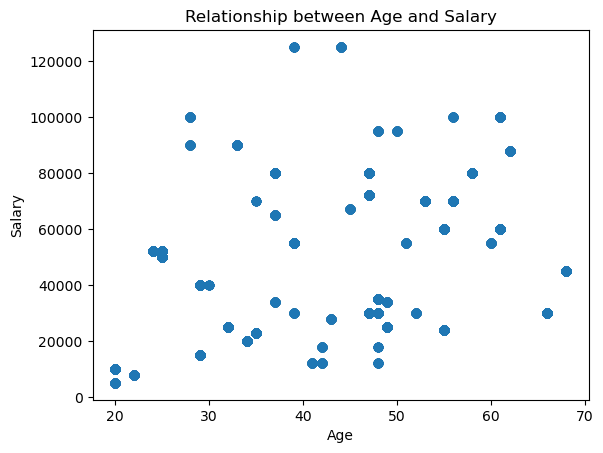

In [38]:
plt.scatter(df["Age"], df["Salary"])
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("Relationship between Age and Salary")
plt.show()

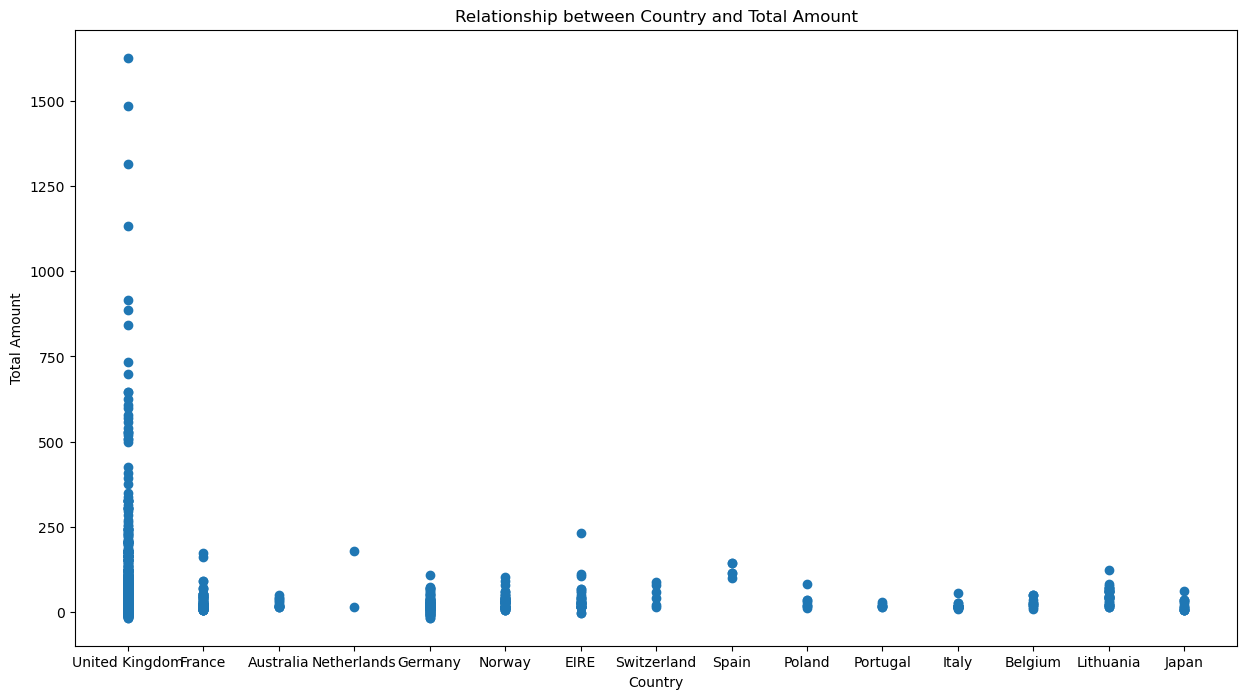

In [39]:
plt.figure(figsize=(15,8))
plt.scatter(df["Country"], df["Total Amount"],)
plt.xlabel("Country")
plt.ylabel("Total Amount")
plt.title("Relationship between Country and Total Amount")
plt.show()

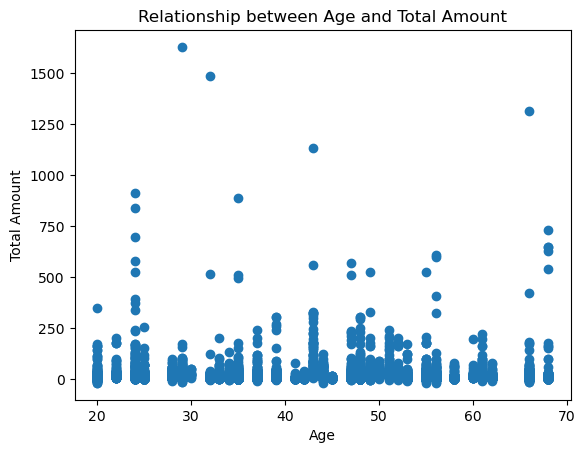

In [40]:
plt.scatter(df["Age"], df["Total Amount"])
plt.xlabel("Age")
plt.ylabel("Total Amount")
plt.title("Relationship between Age and Total Amount")
plt.show()

Pie chart to show the percentage of users in different countries.

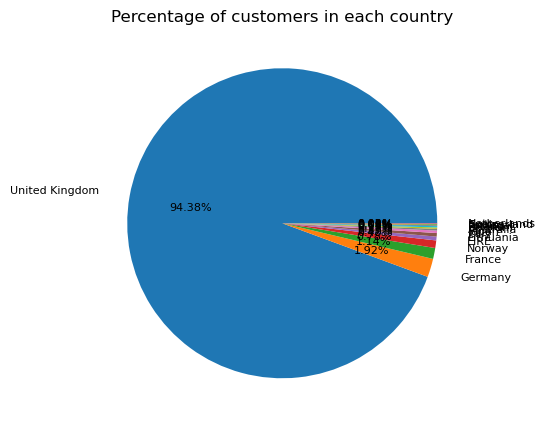

In [41]:
country_value=df.Country.value_counts().values
country_names=df.Country.value_counts().index
plt.figure(figsize=(5,6))
plt.title("Percentage of customers in each country")
plt.pie(country_value,labels=country_names,autopct="%1.2f%%",labeldistance=1.2,textprops={"fontsize":8})
plt.show()

In [42]:
copy=df.copy()

One Hot Encoding

In [43]:
enco_columns =['Gender', 'Country']

copy = pd.get_dummies(cat_col[enco_columns], drop_first=True).astype(int)

In [44]:
copy.head()

,Gender_M,Country_Belgium,Country_EIRE,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Lithuania,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


Frequency Encoding

In [45]:
columns_to_encode = ['Description', 'StockCode']


for column in columns_to_encode:
   
    encoding = df[column].value_counts(normalize=True).to_dict()
    
   
    df[column] = df[column].map(encoding)

In [46]:
colums_to_scale=['Quantity','Age','Salary','Total Amount']
scale=MinMaxScaler()
df[colums_to_scale]=scale.fit_transform(df[colums_to_scale])

In [47]:
df1=pd.concat([df,copy],axis=1)
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Age,Gender,Salary,Total Amount,Segmentation,Gender_M,Country_Belgium,Country_EIRE,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Lithuania,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,536365,0.005909,0.006016,0.004503,2.550000,17850.000000,United Kingdom,0.104167,F,0.375000,0.019645,LOW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,536365,0.002149,0.002149,0.004503,3.390000,17850.000000,United Kingdom,0.104167,F,0.375000,0.022710,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,536365,0.002686,0.002686,0.005196,2.750000,17850.000000,United Kingdom,0.104167,F,0.375000,0.023720,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,536365,0.004297,0.004297,0.004503,3.390000,17850.000000,United Kingdom,0.104167,F,0.375000,0.022710,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,536365,0.004620,0.004620,0.004503,3.390000,17850.000000,United Kingdom,0.104167,F,0.375000,0.022710,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [48]:
df1.drop(['InvoiceNo','CustomerID','Country','Gender'],axis=1,inplace=True)

In [49]:
df1.head()

,StockCode,Description,Quantity,UnitPrice,Age,Salary,Total Amount,Segmentation,Gender_M,Country_Belgium,Country_EIRE,Country_France,Country_Germany,Country_Italy,Country_Japan,Country_Lithuania,Country_Netherlands,Country_Norway,Country_Poland,Country_Portugal,Country_Spain,Country_Switzerland,Country_United Kingdom
0,0.005909,0.006016,0.004503,2.550000,0.104167,0.375000,0.019645,LOW,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.002149,0.002149,0.004503,3.390000,0.104167,0.375000,0.022710,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.002686,0.002686,0.005196,2.750000,0.104167,0.375000,0.023720,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0.004297,0.004297,0.004503,3.390000,0.104167,0.375000,0.022710,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.004620,0.004620,0.004503,3.390000,0.104167,0.375000,0.022710,MEDIUM,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
if df1.isnull().values.any():
    df1 = df1.dropna()  # Drop rows with missing values

In [51]:
df1['Segmentation']=df1['Segmentation'].map({'LOW':0,'MEDIUM':1,'HIGH':2})

In [52]:
X=df1.drop(['Segmentation'],axis=1)
y=df1.Segmentation

In [53]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [54]:
logit_model = sm.Logit(Y_train,X_train).fit()

ValueError: endog must be in the unit interval.